In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv('DataCleaning/train_imputed.csv')

In [6]:
train_df

,admission_age,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,stay_length_hours,pain_cleaned_advanced,...,arrival_transport_UNKNOWN,arrival_transport_WALK IN,race_condensed_AMERICAN INDIAN/ALASKA NATIVE,race_condensed_ASIAN,race_condensed_BLACK,race_condensed_HISPANIC/LATINO,race_condensed_Missing,race_condensed_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_condensed_OTHER,race_condensed_White
0,1.502591,-0.096703,-1.134618,-0.637975,-0.973963,-1.298205,0.006754,0.544617,-0.138610,-1.155919,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.292809,-0.307618,-0.008943,0.166199,0.683379,-0.401036,0.136693,0.544617,-0.011935,1.274389,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.357018,0.114211,-0.965767,0.166199,-0.145292,0.361557,-0.513005,-0.876510,-0.625046,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.098712,0.957869,1.735854,0.166199,0.683379,1.572734,0.699766,-0.876510,0.276886,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.147236,0.008754,-0.740632,-0.637975,0.269044,-0.580470,-0.166499,0.544617,-0.108208,-0.615851,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370195,0.386531,0.114211,2.354975,0.166199,0.683379,1.707309,0.439886,0.544617,-0.526238,1.004354,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370196,1.648164,-0.048117,-0.290362,0.166199,-0.973963,0.854999,-0.383066,0.544617,0.236350,1.004354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370197,-1.214772,0.430583,-0.290362,0.166199,0.269044,-0.984196,-0.729572,1.965744,1.941406,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370198,0.532104,0.008754,-0.571780,0.166199,0.683379,-0.804762,0.266633,0.544617,2.237828,0.464286,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import pandas as pd
import numpy as np
import joblib as jl

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train = pd.read_csv('/Users/tzjsw/Downloads/Erdos/Project-Treatment-Time/Emergency-Department-Wait-Times-/DataCleaning/train.csv')
train = train.drop(columns = ['subject_id', 'hadm_id', 'stay_id', 'race', 'pain', 'intime', 'outtime', 'chiefcomplaint'])

train['race_condensed'] = train['race_condensed'].fillna('Missing')

numeric_vars = ['admission_age', 'temperature', 'heartrate', 'resprate', 'o2sat', 
                'sbp', 'dbp', 'acuity', 'pain_cleaned_advanced']
# categorical_vars = ['gender', 'arrival_transport', 'race_condensed']

numeric = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=100, random_state=2025)),
    # ('scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

impute_standardize = ColumnTransformer(
    transformers=[
        ('num', numeric, numeric_vars),
        # ('cat', categorical, categorical_vars)
    ])


In [8]:
model = Pipeline(steps=[
    ('pre', impute_standardize), 
    ('lin_reg', LinearRegression())
]
)

In [9]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', impute_standardize),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', impute_standardize),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42))
])


In [10]:
X_train = train.drop(columns='stay_length_minutes')

In [11]:
y_train = train['stay_length_minutes']

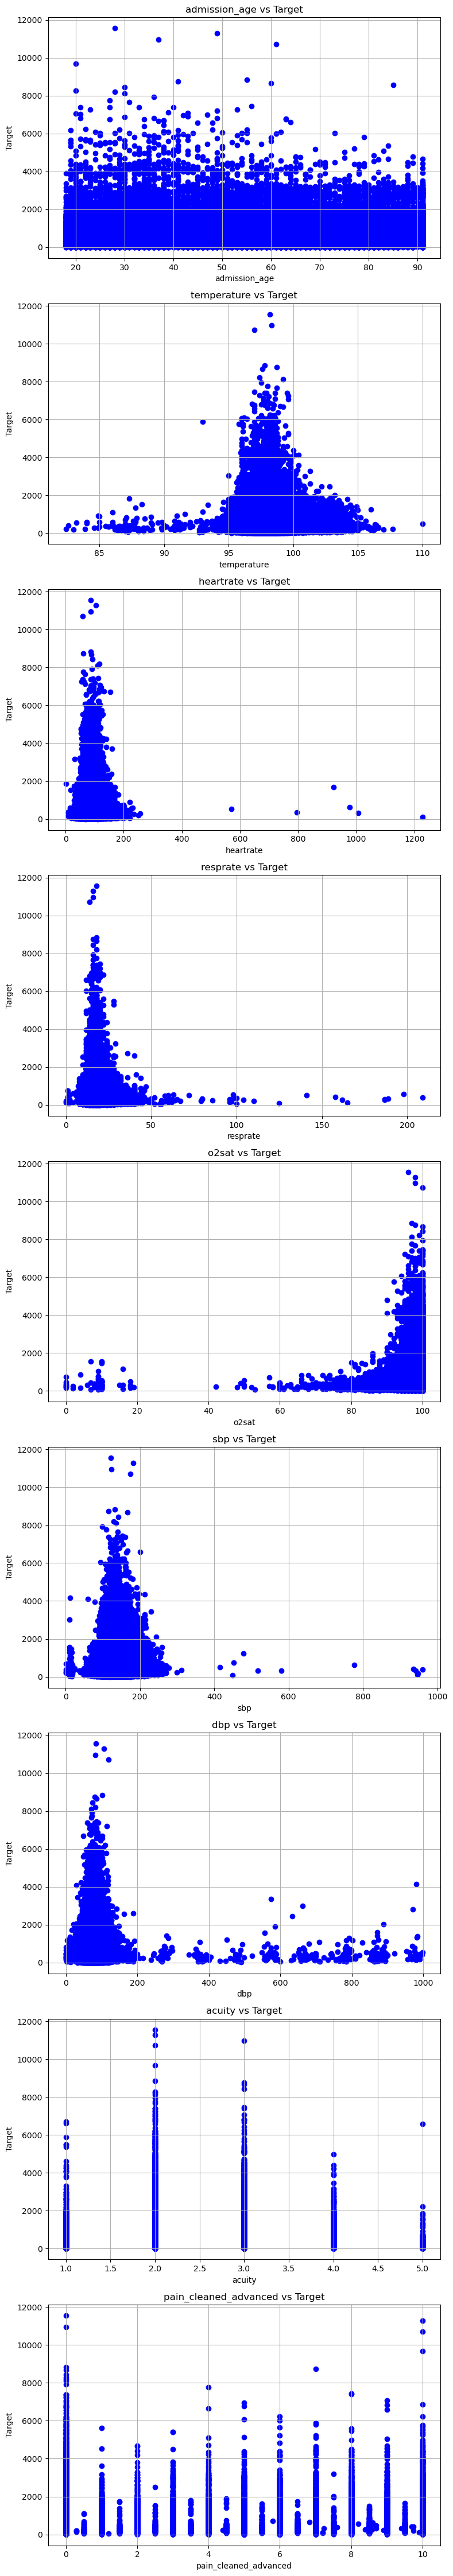

In [12]:
feature_names = ['admission_age', 'temperature', 'heartrate', 'resprate', 'o2sat', 
                'sbp', 'dbp', 'acuity', 'pain_cleaned_advanced']

# Create subplots
num_features = len(feature_names)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 5 * num_features))

# Loop through features and plot each one
for i, feature in enumerate(feature_names):
    ax = axes[i] if num_features > 1 else axes
    ax.scatter(X_train[feature], y_train, color='blue', label=feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs Target')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
model.fit(X_train, y_train)
model.named_steps['lin_reg'].coef_

array([  1.58564671,  -2.34237741,   0.44034667,  -4.67546194,
        -0.85591025,   0.18561103,   0.17556807, -60.40035808,
         0.11535096])

In [15]:
# model.named_steps['lin_reg'].coef_
# array([ 4.47609090e-01, -3.59362895e-02,  1.44191135e-01, -1.80445865e-01,
#         9.28732953e-03,  8.76175070e-02,  7.07184175e-02, -7.02582014e-01,
#         3.12331747e-02,  3.78903709e-02, -3.78903709e-02,  1.75568606e+00,
#        -1.96630032e+00,  2.08787362e+00, -2.48834785e+00,  6.11088487e-01,
#         9.09309946e-01, -9.83425934e-02,  4.20979990e-01,  3.28129160e-01,
#        -1.72997773e+00, -2.04971397e-03, -1.80075295e-03,  1.73751696e-01])

In [16]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(mse, r2)

153298.45037531405 0.022576750590426742


In [17]:
# rf_pipeline.fit(X_train, y_train)
# y_pred_rf = rf_pipeline.predict(X_train)
# mse_rf = mean_squared_error(y_train, y_pred_rf)
# r2_rf = r2_score(y_train, y_pred_rf)
# print(mse_rf, r2_rf)

In [18]:
# test = pd.read_csv('DataCleaning/test.csv')
# X_test = test.drop(columns='stay_length_hours')
# y_test = test['stay_length_hours']
# y_pred_rf_test = rf_pipeline.predict(X_test)
# mse = mean_squared_error(y_test, y_pred_rf_test)
# r2 = r2_score(y_true=y_test, y_pred=y_pred_rf_test)
# print(mse, r2)

In [20]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_train)
mse_xgb = mean_squared_error(y_train, y_pred_xgb)
r2_xgb = r2_score(y_train, y_pred_xgb)
print(mse_xgb, r2_xgb)

141404.03653551888 0.0984149381040752
